    # Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные с сайта Kaggle по сервису Airbnb (https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)

In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('Airbnb_Open_Data.csv', sep=",")

/var/folders/x5/vxnm00_x5mb_9_7q5nnxpp6c0000gn/T/ipykernel_93096/2270684328.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Airbnb_Open_Data.csv', sep=",")


In [4]:
# размер набора данных
data.shape

(102599, 26)

In [5]:
# типы колонок
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
# Первые 5 строк датасета
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 102599


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((102599, 26), (102599, 3))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((102599, 26), (1, 26))

In [11]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,0,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,0,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка lat. Тип данных float64. Количество пустых значений 8, 0.01%.
Колонка long. Тип данных float64. Количество пустых значений 8, 0.01%.
Колонка Construction year. Тип данных float64. Количество пустых значений 214, 0.21%.
Колонка service fee. Тип данных float64. Количество пустых значений 273, 0.27%.
Колонка minimum nights. Тип данных float64. Количество пустых значений 409, 0.4%.
Колонка number of reviews. Тип данных float64. Количество пустых значений 183, 0.18%.
Колонка reviews per month. Тип данных float64. Количество пустых значений 15879, 15.48%.
Колонка review rate number. Тип данных float64. Количество пустых значений 326, 0.32%.
Колонка calculated host listings count. Тип данных float64. Количество пустых значений 319, 0.31%.
Колонка availability 365. Тип данных float64. Количество пустых значений 448, 0.44%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,lat,long,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,40.64749,-73.97237,2020.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,124.0,3.0,0.0,NaN,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...
102594,40.70862,-73.94651,2003.0,169.0,1.0,0.0,NaN,3.0,1.0,227.0
102595,40.80460,-73.96545,2016.0,167.0,1.0,1.0,0.02,2.0,2.0,395.0
102596,40.67505,-73.98045,2009.0,198.0,3.0,0.0,NaN,5.0,1.0,342.0
102597,40.74989,-73.93777,2015.0,109.0,2.0,5.0,0.10,3.0,1.0,386.0


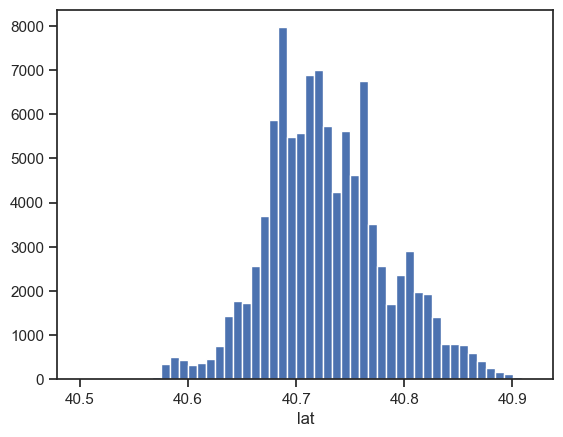

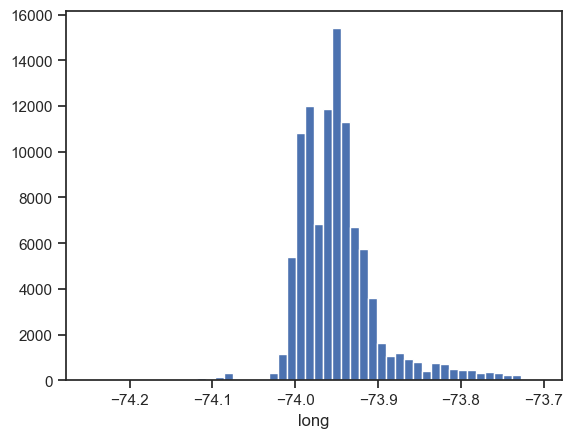

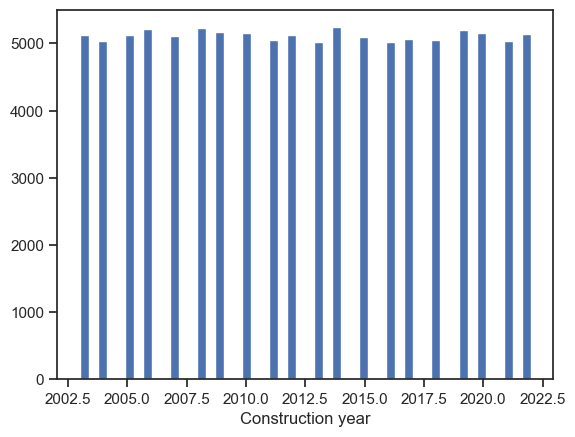

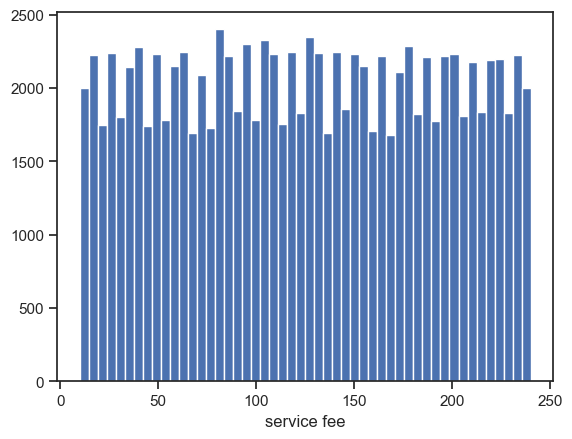

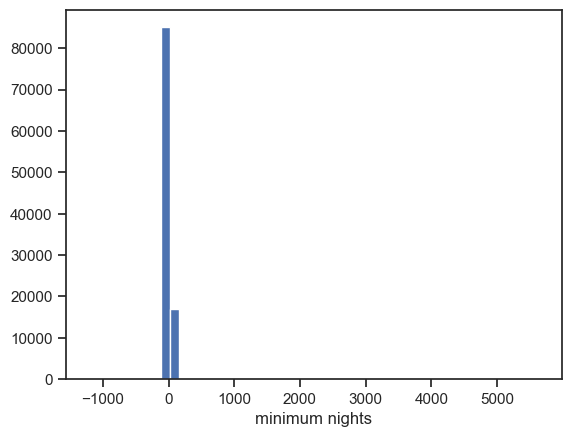

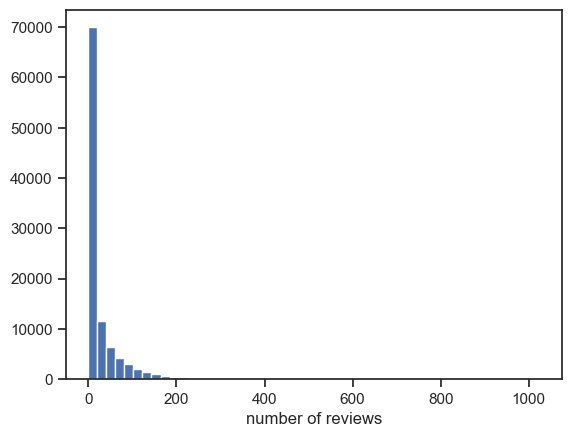

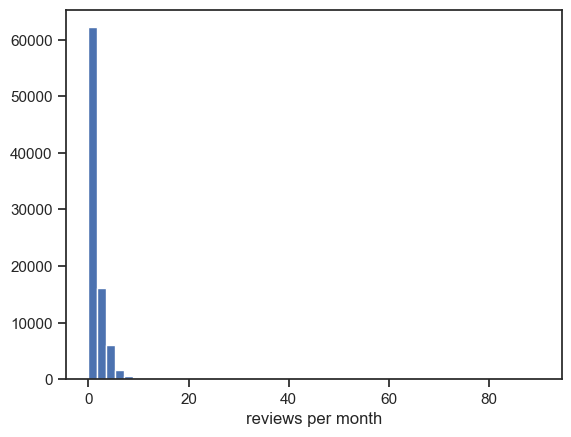

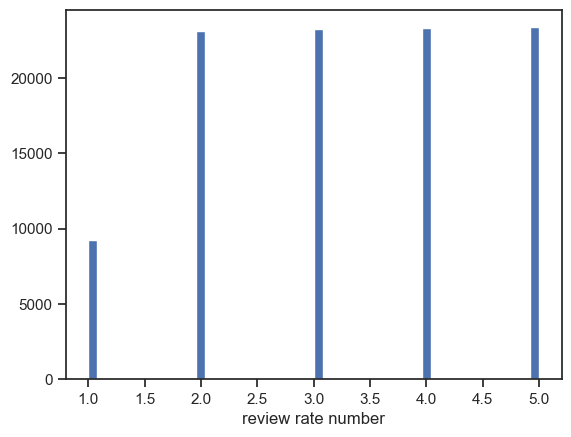

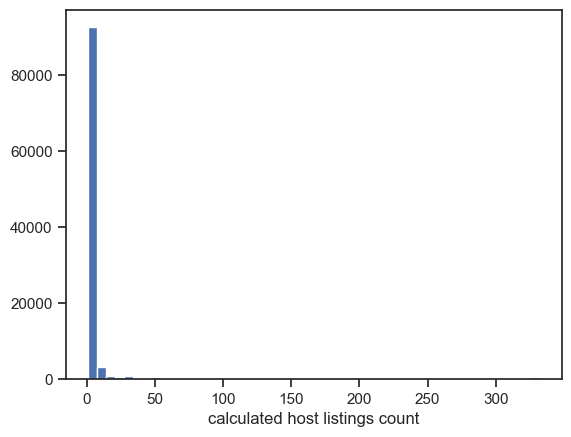

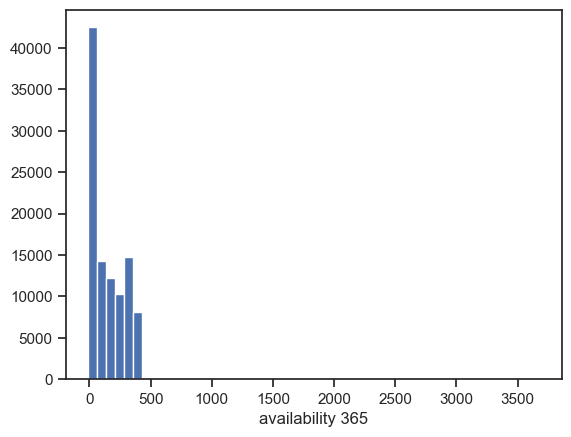

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [16]:
data_num_MasVnrArea = data_num[['minimum nights']]
data_num_MasVnrArea.head()

,minimum nights
0,10.0
1,30.0
2,3.0
3,30.0
4,10.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [19]:
strategies=['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584499, 8.13584499, 8.13584499,
        8.13584499, 8.13584499, 8.13584

In [22]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
 

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [24]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [25]:
data[['reviews per month']].describe()

,reviews per month
count,86720.000000
mean,1.374022
std,1.746621
min,0.010000
25%,0.220000
50%,0.740000
75%,2.000000
max,90.000000


In [26]:
test_num_impute_col(data, 'reviews per month', strategies[0])

('reviews per month', 'mean', 15879, 1.374021909594096, 1.374021909594096)

In [27]:
test_num_impute_col(data, 'reviews per month', strategies[1])

('reviews per month', 'median', 15879, 0.74, 0.74)

In [28]:
test_num_impute_col(data, 'reviews per month', strategies[2])

('reviews per month', 'most_frequent', 15879, 0.03, 0.03)

### Обработка пропусков в категориальных данных

In [29]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка NAME. Тип данных object. Количество пустых значений 250, 0.24%.
Колонка host_identity_verified. Тип данных object. Количество пустых значений 289, 0.28%.
Колонка host name. Тип данных object. Количество пустых значений 406, 0.4%.
Колонка neighbourhood group. Тип данных object. Количество пустых значений 29, 0.03%.
Колонка neighbourhood. Тип данных object. Количество пустых значений 16, 0.02%.
Колонка country. Тип данных object. Количество пустых значений 532, 0.52%.
Колонка country code. Тип данных object. Количество пустых значений 131, 0.13%.
Колонка instant_bookable. Тип данных object. Количество пустых значений 105, 0.1%.
Колонка cancellation_policy. Тип данных object. Количество пустых значений 76, 0.07%.
Колонка price. Тип данных object. Количество пустых значений 247, 0.24%.
Колонка last review. Тип данных object. Количество пустых значений 15893, 15.49%.
Колонка house_rules. Тип данных object. Количество пустых значений 52131, 50.81%.
Колонка license. Тип данных object.

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [30]:
cat_temp_data = data[['cancellation_policy']]
cat_temp_data.head()

,cancellation_policy
0,strict
1,moderate
2,flexible
3,moderate
4,moderate


In [31]:
cat_temp_data['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [32]:
cat_temp_data[cat_temp_data['cancellation_policy'].isnull()].shape

(76, 1)

In [33]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['strict'],
       ['moderate'],
       ['flexible'],
       ...,
       ['moderate'],
       ['strict'],
       ['flexible']], dtype=object)

In [34]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['flexible', 'moderate', 'strict'], dtype=object)

In [35]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['strict'],
       ['moderate'],
       ['flexible'],
       ...,
       ['moderate'],
       ['strict'],
       ['flexible']], dtype=object)

In [36]:
np.unique(data_imp3)

array(['NA', 'flexible', 'moderate', 'strict'], dtype=object)

In [37]:
data_imp3[data_imp3=='NA'].size

76

# Преобразование категориальных признаков в числовые

In [38]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,strict
1,moderate
2,flexible
3,moderate
4,moderate
...,...
102594,flexible
102595,moderate
102596,moderate
102597,strict


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
cat_enc['c1'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [41]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [42]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['flexible', 'moderate', 'strict'], dtype=object)

In [43]:
cat_enc_le

array([2, 1, 0, ..., 1, 2, 0])

In [44]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [45]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2])

array(['flexible', 'moderate', 'strict'], dtype=object)

### Использование OrdinalEncoder

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
data_oe = data[['cancellation_policy', 'room type', 'country code']]
data_oe.head()

,cancellation_policy,room type,country code
0,strict,Private room,US
1,moderate,Entire home/apt,US
2,flexible,Private room,US
3,moderate,Entire home/apt,US
4,moderate,Entire home/apt,US


In [48]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['strict', 'Private room', 'US'],
       ['moderate', 'Entire home/apt', 'US'],
       ['flexible', 'Private room', 'US'],
       ...,
       ['moderate', 'Private room', 'US'],
       ['strict', 'Entire home/apt', 'US'],
       ['flexible', 'Entire home/apt', 'US']], dtype=object)

In [49]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[3., 2., 1.],
       [2., 0., 1.],
       [1., 2., 1.],
       ...,
       [2., 2., 1.],
       [3., 0., 1.],
       [1., 0., 1.]])

In [50]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3.])

In [51]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2., 3.])

In [52]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1.])

In [53]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['NA', 'flexible', 'moderate', 'strict'], dtype=object),
 array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object),
 array(['NA', 'US'], dtype=object)]

In [54]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['strict', 'Private room', 'US'],
       ['moderate', 'Entire home/apt', 'US'],
       ['flexible', 'Private room', 'US'],
       ...,
       ['moderate', 'Private room', 'US'],
       ['strict', 'Entire home/apt', 'US'],
       ['flexible', 'Entire home/apt', 'US']], dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [55]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [56]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [57]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [58]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [61]:
cat_enc.shape

(102599, 1)

In [62]:
cat_enc_ohe.shape

(102599, 3)

In [63]:
cat_enc_ohe

<102599x3 sparse matrix of type '<class 'numpy.float64'>'
	with 102599 stored elements in Compressed Sparse Row format>

In [64]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [65]:
cat_enc.head(10)

,c1
0,strict
1,moderate
2,flexible
3,moderate
4,moderate
5,flexible
6,moderate
7,moderate
8,strict
9,strict


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [66]:
pd.get_dummies(cat_enc).head()

,c1_flexible,c1_moderate,c1_strict
0,False,False,True
1,False,True,False
2,True,False,False
3,False,True,False
4,False,True,False


In [67]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,False,False,True,False
1,False,True,False,False
2,True,False,False,False
3,False,True,False,False
4,False,True,False,False


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [69]:
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].astype(float)

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['price']])

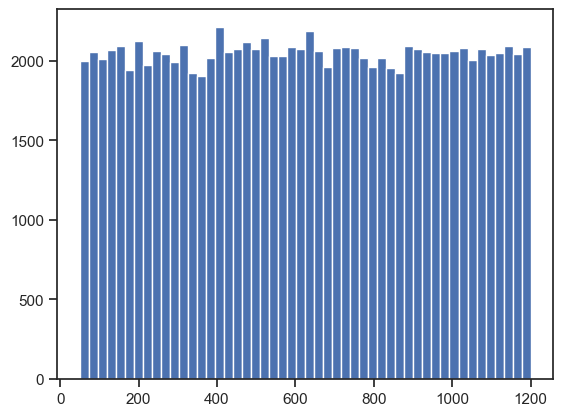

In [70]:
plt.hist(data['price'], 50)
plt.show()

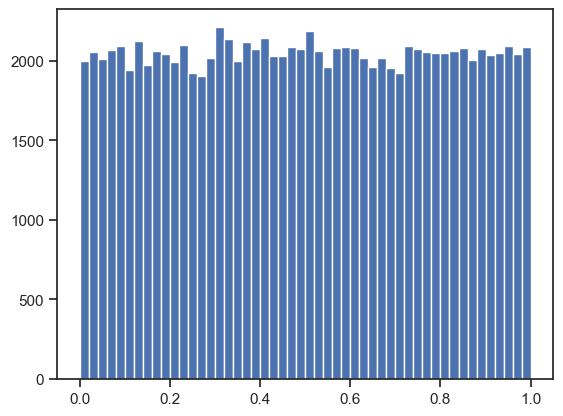

In [71]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [72]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['price']])

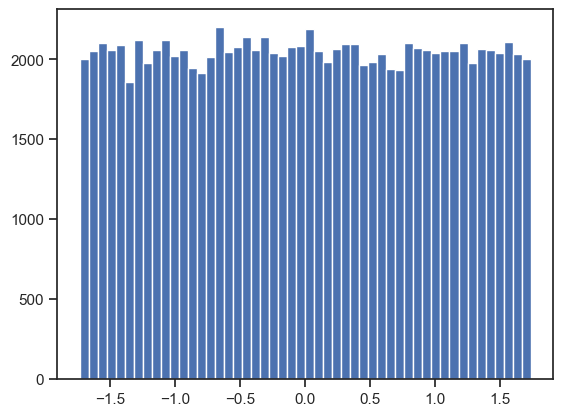

In [73]:
plt.hist(sc2_data, 50)
plt.show()